# Assignment 3 Solutions

These are indicative solutions, and they may deviate from what we discussed online before Assignment 3. 

## Preparation Steps

In [ ]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

In [ ]:
# ### Reading-in the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')

#s = s.replace("\\","/");  # step needed when run locally on Windows
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


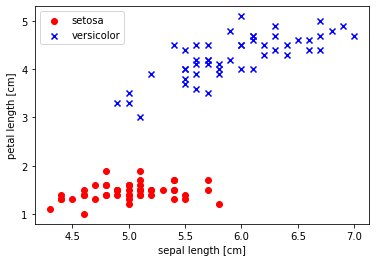

In [ ]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

## <font color = 'blue'>  Question 1. Exact Adaline Weights </font>

In the class we discussed gradient descent for computing the weights of Adaline. It is possible however to use an 'exact' solver: Suppose $\tilde{X}$ is the data matrix, with shape $n\times d$, where $d$ is the number of attributes.  Now let's augment $\tilde{X}$ by adding one extra attribute/column on the left side of $X$ with all entries being equal to 1. Let $X$ be this new matrix (this step reflects that $x_0=1$). Also, let $w$ be the vector of weights (with shape $(d+1)\times 1$, and $y$ be the vector of labels (with shape $n\times 1$). It turns out that the optimal weight vector $w$ is given by 

$$
      w = (X^T X)^{-1} X^T y
$$

(i) Write a Python function *exactAdaline* (using numpy) that takes as input $\tilde{X}$ and $y$ and returns the optimal. weights $w$, following the above formula <br>
(ii) Apply the function on the iris dataset that you imported in an earlier cell. Report the weights calculated by the function. <br>
(iii) The total error for a vector $w$ is given by this formula

$$  err = || Xw - y||_2^2 $$

The subscript of the norm means the 2-norm. Use numpy to do your calculation. 


<br>
<br>
<br>
<br>


*(please insert cells below for your answers)*


<font color = 'red'>  Note to grader: Some students may have implemented the following function as a 'predict' method in an Adaline classifier. That should be fine. Please check the students' code, for similar functionality to the following code.  </font>

In [ ]:
# (i) Q1
def exactAdaline(x_tilde, y):
    """This function takes as input x_tilde and label y and returns the optimal weights w. This replaces the use of gradient descent for computing the weights of Adaline.
    Input
    -----------
    x_tilde : data matrix with shape nxd where d is the number of attributes per sample and n is the number of samples
    y : the vector of labels (with shape nx1)
    
    Output
    -----------
    X: augmented x_tilde by adding the extra column on the left side of x_tilde
    w: data matrix with shape (d+1)x1 - The optimal weight vector for Adaline
    """
    # Augment x_tilde by adding one extra column on the left side of x_tilder with all entries being equal to 1
    # This step reflects that x_0 = 1
    X = np.column_stack((np.ones(x_tilde.shape[0]),x_tilde))
    
    # calculate w using np.dot
    #w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    # calculate w using np.linalg package (producing the same result as using np.dot)
    w = np.linalg.multi_dot([np.linalg.inv(np.dot(X.T,X)),X.T,y])
    return X, w

<font color = 'red'> Note to grader: A correct implementation above, should give the same weights and errors as below. If there are discrepancies, please let me know. If the code is correct 'in spirit' but outputs incorrect results, deduct some points (you can decide how many)

In [ ]:
# (ii) Q1
X_, w = exactAdaline(X,y)
# weights calculated by the function is
w

array([-0.70498922, -0.27494856,  0.7719192 ])

In [ ]:
# (iii) Q1
# Calculate the total error for calculated vector w
err = np.linalg.norm(np.dot(X_,w)-y)**2
err

4.870803095397433

<font color = 'red'> Note to grader: The following few cells give two alternative ways to plot the decision regions. Any answer that gives a plot of the line computed in the previous question should count as correct.  

# Some comment regarding plotting the line that separates the data points based on known weights 
Let's first take a look at an alternate way to draw the line that separate the data points.

In the Iris dataset, based on our answer to question 1, part (ii) we have <br><br>
$z = w^Tx = w_0 + w_1x_1 + w_2x_2$ where $w_0 = -0.70498922$, $w_1 = -0.27494856$, $w_2 = 0.7719192$ (*) <br><br>
When we plot the data in 2-D where the horizontal axis is labeled $x_1$ and the vertical axis is labeled $x_2$, we will calculate the intersection of the separated line on the two axes as followed

Give (*) when $z = 0, x_1 = 0$, we have $0 = w_0 + w_1*0 + w_2x_2$ $\rightarrow$ $x_2 = 0.9132940496035133$ and 
when $z = 0, x_2 = 0$, $x_1 = -2.564076814341438$

In [ ]:
x_1 = -w[0]/w[1]
x_2 = -w[0]/w[2]

# This line x_2 = ax_1 + b, when x_1 (attribute 1 = 0), we can derive b
b = x_2
# we then derive a (when x_2 = 0)
a = -b/x_1
print(a)
print(b)

0.35618825633270945
0.9132940496037494


We have obtain the line to separate the data points based on the weights once they are known. This line will be drawn against the plot where two axes are the two attributes of the data point. Note that, this does not mean $x_2$ is dependent on $x_1$. The derivation is to draw a line for demonstration purpose only. This is different from the way the book has shown you how to derive such line.
$x_2 = ax_1 + b$

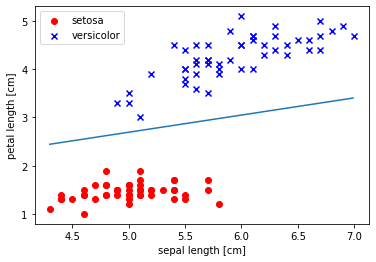

In [ ]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

#########################################
### here is our line of separation ****
### begin
x = np.arange(min(X[:100,0]),max(X[:100,0]),0.01)
plt.plot(x, a*x+b)
### end
#########################################

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [ ]:
# Alternately, if you like to present the region like the book, you can use the below plot function

def plot_decision_regions_adaline(X, y, w_, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # utilize given weight to derive Adaline classification decision.
    net_input = np.dot(np.array([xx1.ravel(), xx2.ravel()]).T, w_[1:]) + w_[0]
    Z = np.where(net_input >= 0.0, 1, -1).reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

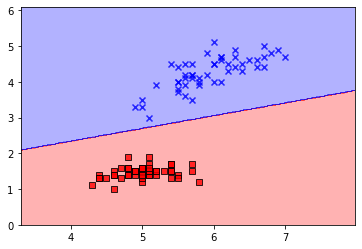

In [ ]:
# this result should match our line drawing result given the same w
plot_decision_regions_adaline(X,y,w)

<font color = 'red'>  This is a verification that gradient descent computes the same solution as the exact solver. This is is not required in the solution. 

### Based on the above result. Let's write a function that quickly help us test our investigation/hypotheses for question 2. This is done by plotting the separation line based on the data points given, and the result from exactAdaline

In [ ]:
def quick_test_2d(w, X, y):
    """This function takes as input a vector weights for some data X up to 100 samples with the first two attributes and draw a line between the data points and see if it works.
    Input
    -----------
    w : data matrix with shape 3x1 - The optimal weight vector for Adaline
    X : data matrix with shape nx2 where 2 is the number of attributes per sample and n is the number of samples. The data features/ attributes ploted in 2-D will be linearly separable.
    y : the vector of labels (with shape nx1). y should only have 2 classes
    
    Output
    -----------
    A 2-D drawing that facilitates our questioning if the weights provided could separate the data successfully. Each of the axis portraits one (out of 2 attributes of the data)

    """
    
    # identify the line to separate the data points based on exactAdaline function
    x_1_ = -w[0]/w[1]
    x_2_ = -w[0]/w[2]
    b = x_2_
    a = -b/x_1_    
    
    # gather the two classes regardless of how they are coded
    cl = np.unique(y)
    # gather data point belonging to class 1
    # identify the indices of records that belong to class 1
    idx1 = np.where(y == cl[0])
    idx2 = np.where(y == cl[1])
    # class 1: first attribute  c1_x1 = X[idx1,0], second attribute    c1_x2 = X[idx1,0]
    # class 2: first attribute  c2_x1 = X[idx2,0], second attribute    c2_x2 = X[idx2,0]
    
    plt.scatter(X[idx1,0], X[idx1,1],
            color='red', marker='o', label='class labeled '+np.array2string(cl[0]))
    plt.scatter(X[idx2,0], X[idx2,1],
                color='blue', marker='x', label='class labeled '+np.array2string(cl[1]))

    plt.xlabel('attribute 1')
    plt.ylabel('attribute 2')
    plt.legend(loc='upper left')

    ### here is our line of separation
    ### begin
    x = np.arange(min(X[:,0]),max(X[:,0]),0.01)
    plt.plot(x, a*x+b)
    ### end

    # plt.savefig('images/02_06.png', dpi=300)
    plt.show()

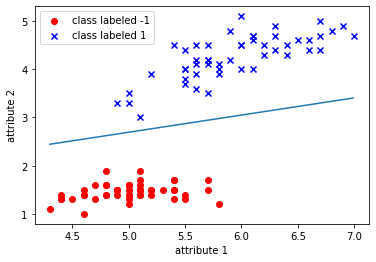

In [ ]:
# test quick_test_2d function using Iris 100 samples
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[:100, [0, 2]].values
quick_test_2d(w, X, y)

## <font color = 'blue'>  Question 2. Adaline Fail ? </font>

Unlike the perceptron, adaline does not guarantee that the output will actually separate 2-label data points that are linearly separable. Construct a 2-dimensional data set (i.e. the data points and their labels), with the properties that: <br> 

(a) the data set is linearly separable  <br>
(b) the optimal adaline solution does not separate the data.  <br>

Demonstrate your answer as follows: <br>

(i) Plot the data points, as we did above for the iris data set. This will show that your data set is linearly separable. <br>
(ii) Calculate the optimal adaline weights using the function *exactAdaline* from question 1. <br>
(iii) Find one point in your data set, and show the calculations that prove that it is misclassified by the optimal adaline. 



<br>
<br>
<br>
<br>


*(please insert cells below for your answers)*

<font color = 'red'> Note to grader: The following cells contain different solutions. Some of them use many points, but the solution can consist of only a few points. The most important things to check in students' solutions is (i) whether the given data set is indeed linearly separable (ii) adaline should not produce a correct linear separation. 

<b>Option1</b>
The ask is for us to "fool" Adaline. By intuition, to confuse such algorithm, we have to create a set of data points so that one class is pretty dense and clump together, and the data points belonging to the other class are being scattered in a much wider area.

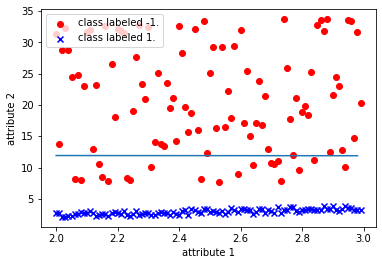

In [ ]:
# first class
cl1_x1_q2 = np.arange(2,3,0.01)
cl1_x2_q2 = cl1_x1_q2 + np.random.rand(cl1_x1_q2.shape[0])
y1_q2 = np.ones(cl1_x1_q2.shape[0])

# second class
cl2_x1_q2 = np.arange(2,3,0.01)
cl2_x2_q2 = cl2_x1_q2 + np.random.rand(cl2_x1_q2.shape[0])*26 + 5
y2_q2 = np.ones(cl2_x1_q2.shape[0])*-1 

# generate X
X_q2 = np.vstack((np.column_stack((cl1_x1_q2,cl1_x2_q2)),np.column_stack((cl2_x1_q2, cl2_x2_q2))))
y_q2 = np.hstack((y1_q2, y2_q2))

# apply exactAdaline function, ignoring the first output (using _)
# question 2 (ii)
_, w_q2 = exactAdaline(X_q2,y_q2)

# question 2 (i)
quick_test_2d(w_q2, X_q2, y_q2)

<b>Option1.1</b> In addition to how we generate the data in option 1, we can provide Adaline with a very imbalanced data set. Although the classes are linearly separable, we only supply a few for the first class, and many for the second classes. It will sure confuse Adaline

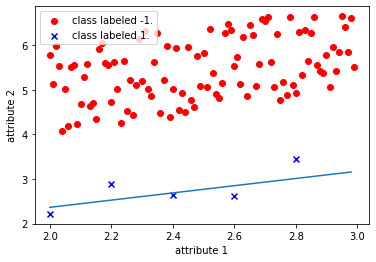

In [ ]:
# first class
cl1_x1 = np.arange(2,3,0.2)
cl1_x2 = cl1_x1 + np.random.rand(cl1_x1.shape[0])
y1 = np.ones(cl1_x1.shape[0])

# second class
cl2_x1 = np.arange(2,3,0.01)
cl2_x2 = cl2_x1 + np.random.rand(cl2_x1.shape[0])*2 + 2
y2 = np.ones(cl2_x1.shape[0])*-1 

# generate X
X_q2_ = np.vstack((np.column_stack((cl1_x1,cl1_x2)),np.column_stack((cl2_x1, cl2_x2))))
y_q2_ = np.hstack((y1, y2))

# apply exactAdaline function, ignoring the first output (using _)
# question 2 (ii)
_, w_q2_ = exactAdaline(X_q2_,y_q2_)

# question 2 (i)
quick_test_2d(w_q2_, X_q2_, y_q2_)

From option 1, since the manufactured data is stable within the first attribute, and spreads based on the 2nd attribute, we will pick the lowest point (of the 2nd attribute) of the  from the above plot and show that it is misclassified using the weights we obtained from exactAdaline

In [ ]:
x_fail_1 = cl2_x1_q2[np.where(cl2_x2_q2 == min(cl2_x2_q2))]
x_fail_2 = cl2_x2_q2[np.where(cl2_x2_q2 == min(cl2_x2_q2))]
print('Data Point where the classification surely failed in this manufactured set: {}, {}'.format(x_fail_1, x_fail_2))

Data Point where the classification surely failed in this manufactured set: [2.09], [7.28118747]


In [ ]:
#The class of this point is
y_fail = y2_q2[np.where(cl2_x2_q2 == min(cl2_x2_q2))]
y_fail

array([-1.])

In [ ]:
phi_z = w_q2[0] + w_q2[1]*x_fail_1 + w_q2[2]*x_fail_2
phi_z

array([0.3496979])

In [ ]:
# a positive phi(z) will lead Adaline to classify this point as class labeled 1.

##### Option 2: This option will only look at 3 points (0,1.0000000001) with label 1, and (2,1), and ($10^4$,1) with label -1

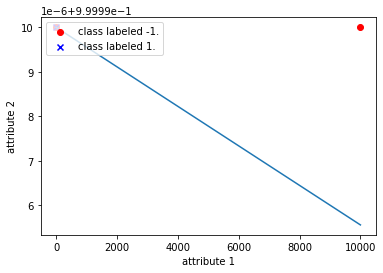

-2.2513442672789097e-05 -0.000200082256924361 -1.000411301269196


In [ ]:
# first class
cl1_o2 = np.array([[0,1.0000000001]])
y1_o2 = np.array([1.])

# second class
cl2_o2 = np.array([[2,1],[10**4,1]])
y2_o2 = np.array([-1.,-1.])

# generate X
X_o2 = np.vstack((cl1_o2, cl2_o2))
y_o2 = np.hstack((y1_o2, y2_o2))

# apply exactAdaline function, ignoring the first output (using _)
# question 2 (ii)
_, w_q2_o2 = exactAdaline(X_o2,y_o2)

# question 2 (i)
quick_test_2d(w_q2_o2, X_o2, y_o2)

# The class of the failed point is (2,1)
phi_z1 = w_q2_o2[0] + w_q2_o2[1]*X_o2[0,0] + w_q2_o2[2]*X_o2[0,1]
phi_z2 = w_q2_o2[0] + w_q2_o2[1]*X_o2[1,0] + w_q2_o2[2]*X_o2[1,1]
phi_z3 = w_q2_o2[0] + w_q2_o2[1]*X_o2[2,0] + w_q2_o2[2]*X_o2[2,1]
print(phi_z1, phi_z2, phi_z3)
# As we can see, the 2nd data point (2,1) is misclassified to be 1 where phi_z2 = 0.4997
# It is harder to see it in the plot due to the range of attribute 1 is quite large

## <font color = 'blue'>  Question 3. Practice with logistic regression

Let's first load the textbook's implementation of logistic regression with gradient descent.

In [ ]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

<font color = 'red'> Note to grader: Some students may do Gradient descent. That should use all 2 points and calculate one update at the end. If they do Stochastic gradient descent, then 3 different updates should take place, similar to the previous assignment.  Both GD ans SGD are acceptable answers. 

Here it important to check that the predicted output is a realy number between 0 and 1, and not a rounded number as in the perceptron case. </font>

> Indented block



Below you can see the first 3 data points of the data set, all labeled as 'setosa'. Let's set the numerical value for 'setosa' to 1. (i.e. y = 1). 

In [ ]:
print(X[0:3])
print(y_sample[0:3])

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]]
[[1.]
 [1.]
 [1.]]



Suppose the initial weights of the logistic neuron are w0=0.1, w1=-0.2, w2=0.1

(i) In the following space, write the weights after processing data points 0,1,2, with $\eta=0.1$ and show your calculations. (This is similar to the previous assignment, only done now for the logistic neuron) <br>



<b>Way 1</b> You can treat the three data points as the data set

In [ ]:
#set up the stage for the question
X_sample = X[0:3]
y_sample = np.ones([1,3]).reshape(X_sample.shape[0],1)
w = [[0.1], [-0.2], [0.1]]
eta = 0.1


# calculate net input
net_input = np.dot(X[0:3], w[1:])+ w[0]
# calculate logistic sigmoid activation
output = 1./(1.+np.exp(-np.clip(net_input,-250,250)))
errors = (y_sample - output)
w[1:]+= eta * X_sample.T.dot(errors)
w[0] += eta * errors.sum()

# conclusion
print('If we only proces the first 3 points, the new weight vector is {}'.format(w))

If we only proces the first 3 points, the new weight vector is [array([0.30330771]), array([0.79651337]), array([0.37792679])]


<b>Way 2</b> You can use stochastic gradient descend which will look at one sample at a time

In [ ]:
# way 2
w = np.array([0.1, -0.2, 0.1])
eta = 0.1
for i, record in enumerate(X_sample):
    net_input = np.dot(record, w[1:])+ w[0]
    
    # calculate logistic sigmoid activation
    output = 1./(1.+np.exp(-np.clip(net_input,-250,250)))
    
    errors = y_sample[i] - output
    print(errors,  net_input, output)
    w[1:]+= eta * X_sample[i].T*errors[0]
    w[0] += eta * errors.sum()

    # conclusion
    print('The new weight vector is {} after processing point {}'.format(w,i))

[0.68568011] -0.78 0.31431988606174616
The new weight vector is [0.16856801 0.14969686 0.19599522] after processing point 0
[0.23568643] 1.1764759184574194 0.7643135730004393
The new weight vector is [0.19213665 0.26518321 0.22899132] after processing point 1
[0.14979798] 1.7361864390344461 0.8502020242725015
The new weight vector is [0.20711645 0.33558826 0.24846505] after processing point 2


(ii) Using *LogisticRegressionGD* check if the data set you constructed in Question 2, also force logistic regression to fail. You can experiment with the number of iterations and the learning rate $\eta$. 

(iii) (optional) If logistic regression does not fail for your data set, can you construct another (linearly separable) data set which causes it to fail?

*(please insert cells below for your answers)*

<font color = 'red'> Note to grader: In this question there are two possible cases. It may be that the student's data set from the previous question works OK with logistic regression, or not. A correct demonstration gets full points.
Now in the case the data set works OK, then the student should be able to demonstrate another data set for which logistic regression also fails.

Also note that the labels for logistic regression must be adjusted to 0 and 1, unlike adaline which is -1 and 1.  </font>

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions_logistic(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [ ]:
# This cell adjusts the labels of our data sets

print(np.unique(y_q2))
y_q2_new = (y_q2 + 1)/2
print(np.unique(y_q2_new))

print(np.unique(y_o2))
y_o2_new = (y_o2 + 1)/2
print(np.unique(y_o2_new))






[-1.  1.]
[0. 1.]
[-1.  1.]
[0. 1.]


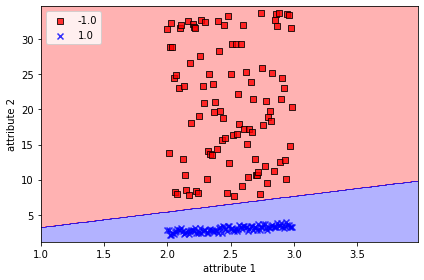

In [ ]:
# Q3(ii) we will use the data set presented in Option 1
lrgd = LogisticRegressionGD(eta=0.0001, n_iter=1000, random_state=1)
lrgd.fit(X_q2, y_q2_new)

# we can't use quick_test_2d here because it is written specifically for Adaline
# we will use the book code to see the result of using logistic regression

plot_decision_regions_logistic(X=X_q2, 
                      y=y_q2,
                      classifier=lrgd)

plt.xlabel('attribute 1')
plt.ylabel('attribute 2')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)
plt.show()

### Conclusion: In this case, it looks that logistic regression works. 

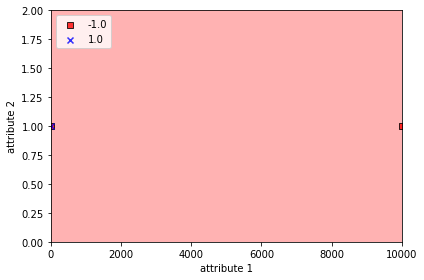

In [ ]:
# now let's use the small data set

# Q3(ii) we will use the data set presented in Option 1
lrgd = LogisticRegressionGD(eta=0.01, n_iter=1000, random_state=1)
lrgd.fit(X_o2, y_o2_new)

# we can't use quick_test_2d here because it is written specifically for Adaline
# we will use the book code to see the result of using logistic regression

plot_decision_regions_logistic(X=X_o2, 
                      y=y_o2,
                      classifier=lrgd)

plt.xlabel('attribute 1')
plt.ylabel('attribute 2')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)
plt.show()

In this case, it appears that the data set is able to confuse logistic regression. 